### Import the Libraries

In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Read the Csv File

In [456]:
df=pd.read_csv(r'E:\DATASETS\car_price.csv')

### Understand about the Dataset

In [457]:
df.head()

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [458]:
df.shape

(210, 25)

### Check Duplicate and Null Values

In [459]:
df.isnull().sum()

CarName             0
carbody             0
drivewheel          0
enginelocation      0
fueltype            0
aspiration          0
doornumber          0
cylindernumber      0
enginetype          0
fuelsystem          0
symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [460]:
df.duplicated().sum()

5

In [461]:
df=df.drop_duplicates()

In [462]:
df.shape

(205, 25)

### EDA

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   carbody           205 non-null    object 
 2   drivewheel        205 non-null    object 
 3   enginelocation    205 non-null    object 
 4   fueltype          205 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   cylindernumber    205 non-null    object 
 8   enginetype        205 non-null    object 
 9   fuelsystem        205 non-null    object 
 10  symboling         205 non-null    int64  
 11  wheelbase         205 non-null    float64
 12  carlength         205 non-null    float64
 13  carwidth          205 non-null    float64
 14  carheight         205 non-null    float64
 15  curbweight        205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [464]:
df.head()

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [465]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [466]:
df['CarName']=df['CarName'].apply(lambda car: car.split(' ')[0])
df['CarName']=df['CarName'].str.replace('-',' ')
df['CarName']=df['CarName'].str.replace('Nissan','nissan')
df['CarName']=df['CarName'].str.replace('toyouta','toyota')
df['CarName']=df['CarName'].str.replace('porcshce','porsche')
df['CarName']=df['CarName'].str.replace('vokswagen','volkswagen')
df['CarName']=df['CarName'].str.replace('vw','volkswagen')
df['CarName']=df['CarName'].str.replace('maxda','mazda')

In [467]:
df['CarName'].unique()

array(['alfa romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [468]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

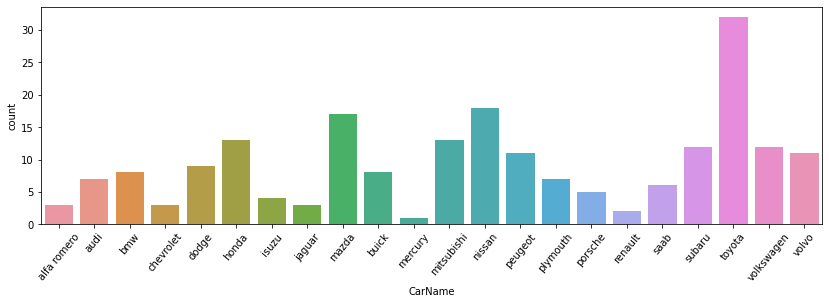

In [469]:
plt.figure(figsize=(14,4))
s=sns.countplot(df['CarName'])
s.set_xticklabels(labels=df['CarName'].unique(),rotation=50)
plt.show()

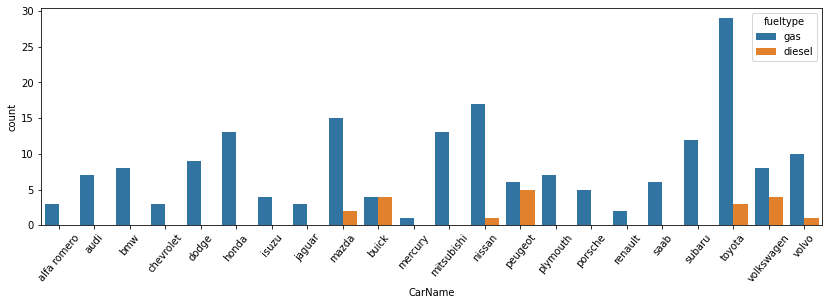

In [470]:
plt.figure(figsize=(14,4))
s=sns.countplot(df['CarName'],hue=df['fueltype'])
s.set_xticklabels(labels=df['CarName'].unique(),rotation=50)
plt.show()

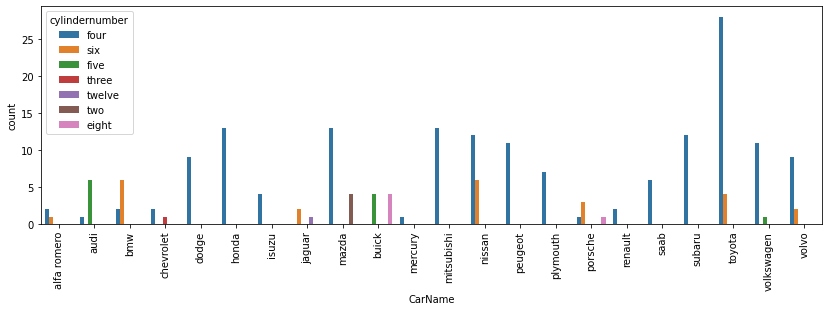

In [471]:
plt.figure(figsize=(14,4))
s=sns.countplot(df['CarName'],hue=df['cylindernumber'])
s.set_xticklabels(labels=df['CarName'].unique(),rotation=90)
plt.show()

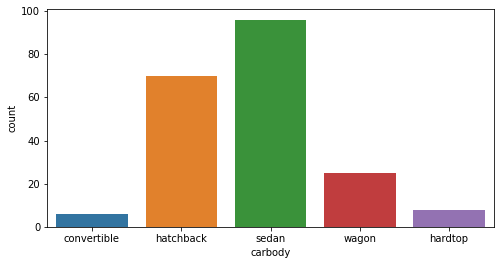

In [472]:
plt.figure(figsize=(8,4))
sns.countplot(df['carbody'])
plt.show()

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

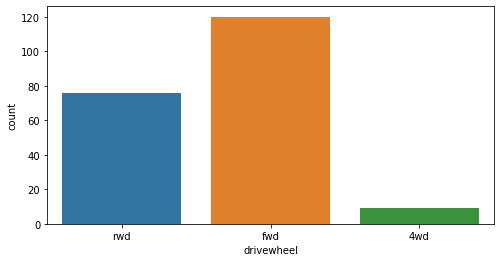

In [473]:
plt.figure(figsize=(8,4))
sns.countplot(df['drivewheel'])

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

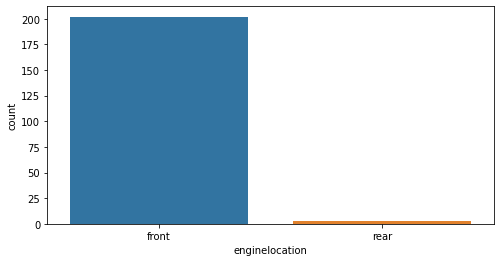

In [474]:
plt.figure(figsize=(8,4))
sns.countplot(df['enginelocation'])

<AxesSubplot:xlabel='fueltype', ylabel='count'>

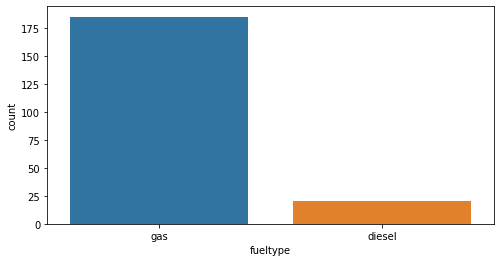

In [475]:
plt.figure(figsize=(8,4))
sns.countplot(df['fueltype'])

<AxesSubplot:xlabel='aspiration', ylabel='count'>

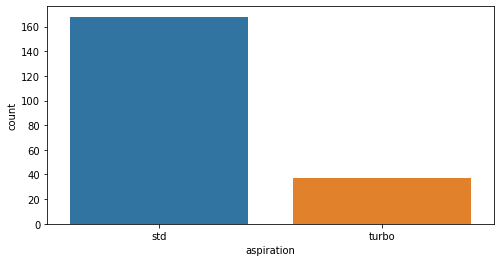

In [476]:
plt.figure(figsize=(8,4))
sns.countplot(df['aspiration'])

<AxesSubplot:xlabel='doornumber', ylabel='count'>

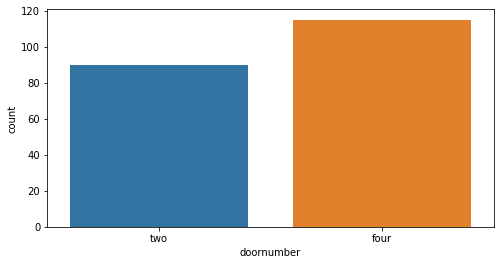

In [477]:
plt.figure(figsize=(8,4))
sns.countplot(df['doornumber'])

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

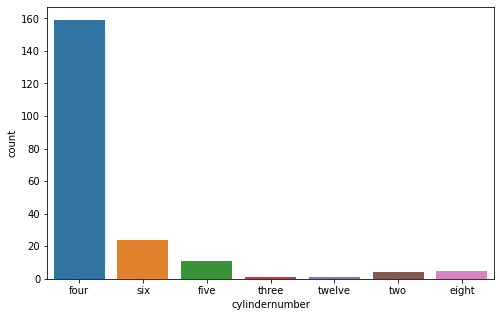

In [478]:
plt.figure(figsize=(8,5))
sns.countplot(df['cylindernumber'])

<AxesSubplot:xlabel='enginetype', ylabel='count'>

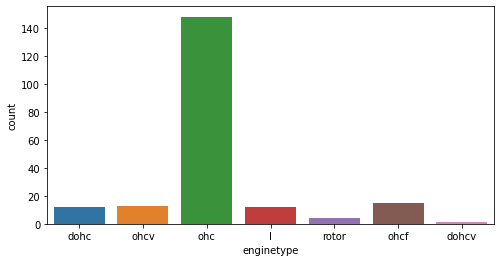

In [479]:
plt.figure(figsize=(8,4))
sns.countplot(df['enginetype'])

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

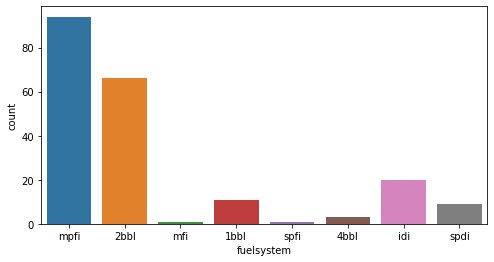

In [480]:
plt.figure(figsize=(8,4))
sns.countplot(df['fuelsystem'])

<AxesSubplot:xlabel='symboling', ylabel='Density'>

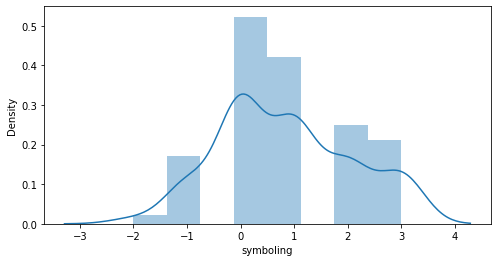

In [481]:
plt.figure(figsize=(8,4))
sns.distplot(df['symboling'])

<AxesSubplot:xlabel='symboling'>

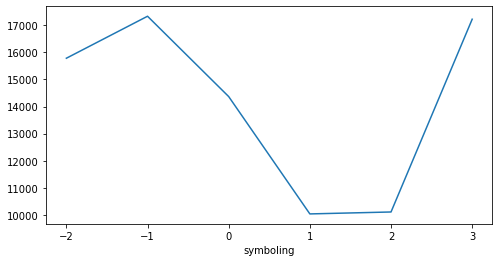

In [482]:
plt.figure(figsize=(8,4))
df.groupby('symboling')['price'].mean().plot()

<AxesSubplot:xlabel='wheelbase', ylabel='Density'>

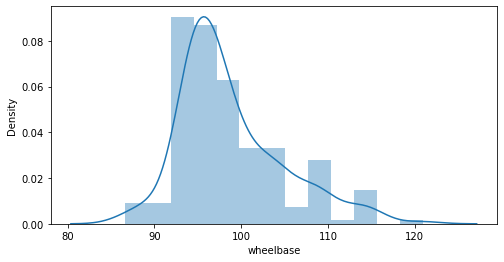

In [483]:
plt.figure(figsize=(8,4))
sns.distplot(df['wheelbase'])

<AxesSubplot:xlabel='wheelbase', ylabel='price'>

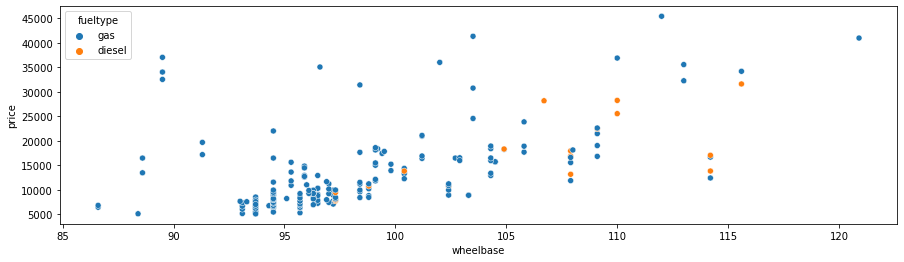

In [484]:
plt.figure(figsize=(15,4))
sns.scatterplot(df['wheelbase'],df['price'],hue=df['fueltype'])

<AxesSubplot:xlabel='wheelbase'>

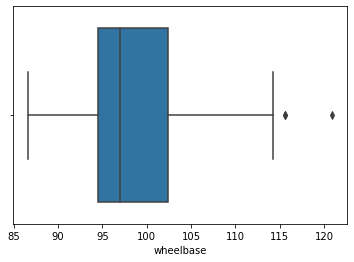

In [485]:
sns.boxplot(df['wheelbase'])

<AxesSubplot:xlabel='carlength', ylabel='Density'>

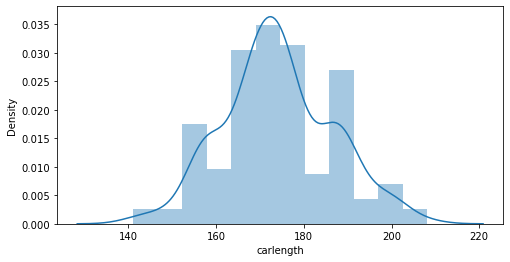

In [486]:
plt.figure(figsize=(8,4))
sns.distplot(df['carlength'])

<AxesSubplot:xlabel='carlength', ylabel='price'>

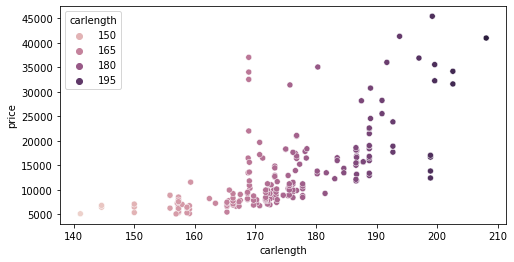

In [487]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['carlength'],df['price'],hue=df['carlength'])

<AxesSubplot:xlabel='carlength'>

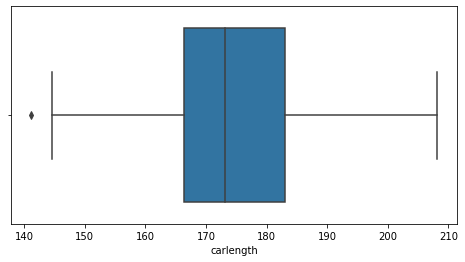

In [488]:
plt.figure(figsize=(8,4))
sns.boxplot(df['carlength'])

<AxesSubplot:xlabel='carwidth', ylabel='Density'>

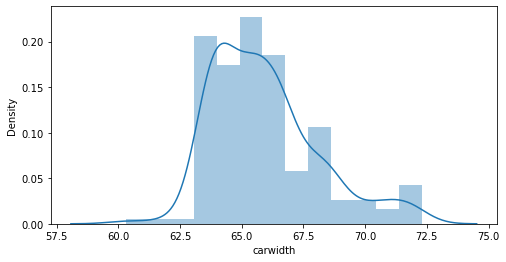

In [489]:
plt.figure(figsize=(8,4))
sns.distplot(df['carwidth'])

<AxesSubplot:xlabel='carwidth', ylabel='price'>

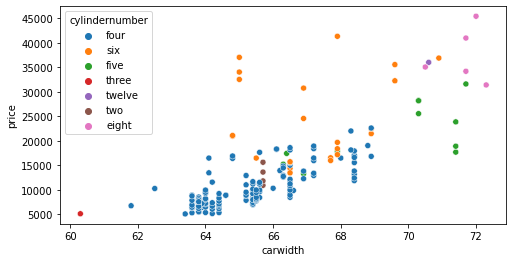

In [490]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['carwidth'],df['price'],hue=df['cylindernumber'])

<AxesSubplot:xlabel='carwidth'>

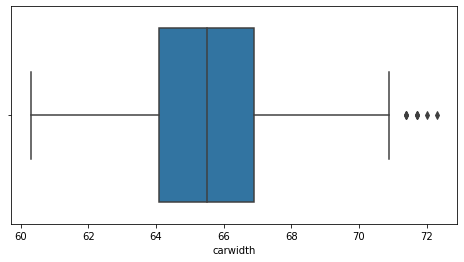

In [491]:
plt.figure(figsize=(8,4))
sns.boxplot(df['carwidth'])

<AxesSubplot:xlabel='carheight', ylabel='Density'>

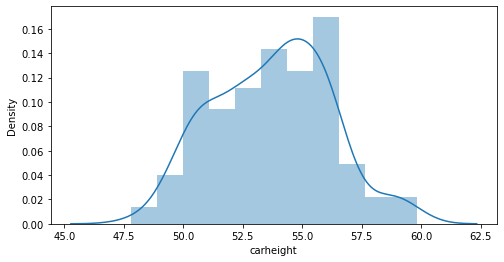

In [492]:
plt.figure(figsize=(8,4))
sns.distplot(df['carheight'])

,carheight,price
carheight,1.000000,0.119336
price,0.119336,1.000000


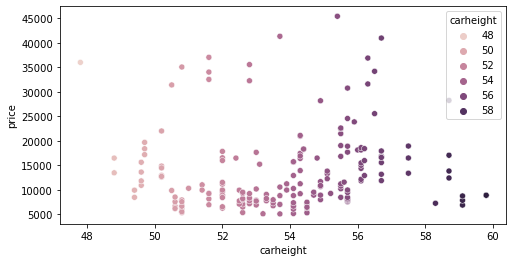

In [493]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['carheight'],df['price'],hue=df['carheight'])
df[['carheight','price']].corr()

<AxesSubplot:xlabel='carheight'>

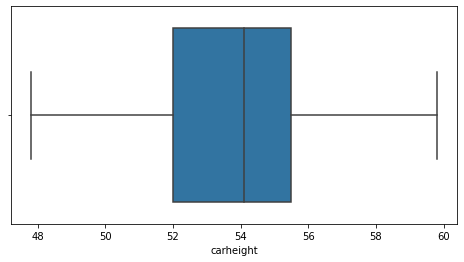

In [494]:
plt.figure(figsize=(8,4))
sns.boxplot(df['carheight'])

<AxesSubplot:xlabel='curbweight', ylabel='Density'>

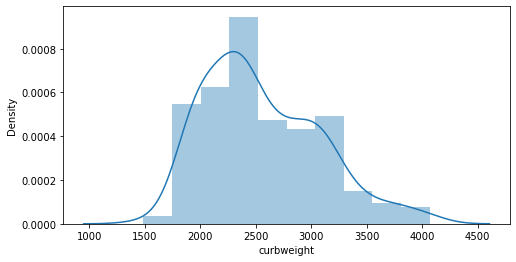

In [495]:
plt.figure(figsize=(8,4))
sns.distplot(df['curbweight'])

<AxesSubplot:xlabel='curbweight', ylabel='price'>

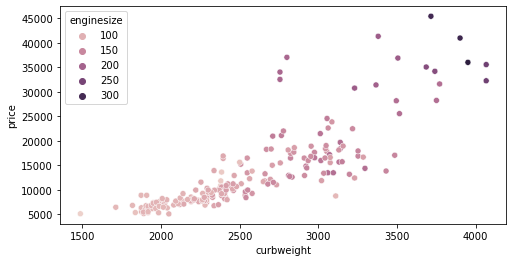

In [496]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['curbweight'],df['price'],hue=df['enginesize'])

<AxesSubplot:xlabel='curbweight'>

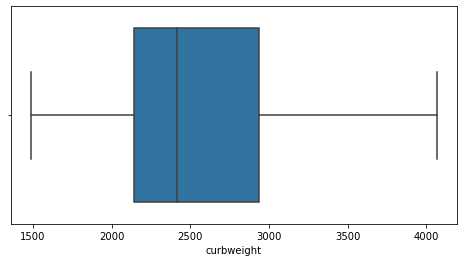

In [497]:
plt.figure(figsize=(8,4))
sns.boxplot(df['curbweight'])

<AxesSubplot:xlabel='enginesize', ylabel='Density'>

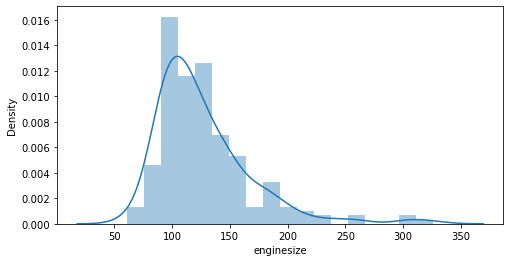

In [498]:
plt.figure(figsize=(8,4))
sns.distplot(df['enginesize'])

<AxesSubplot:xlabel='enginesize', ylabel='price'>

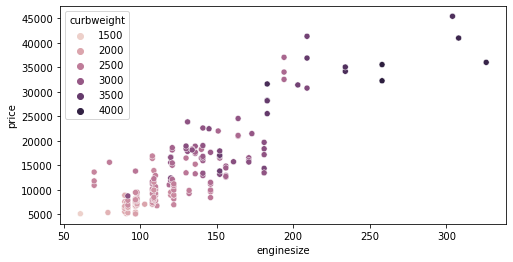

In [499]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['enginesize'],df['price'],hue=df['curbweight'])

<AxesSubplot:xlabel='enginesize'>

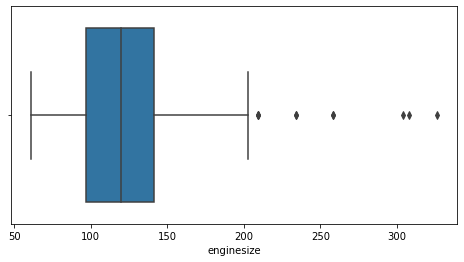

In [500]:
plt.figure(figsize=(8,4))
sns.boxplot(df['enginesize'])

<AxesSubplot:xlabel='boreratio', ylabel='Density'>

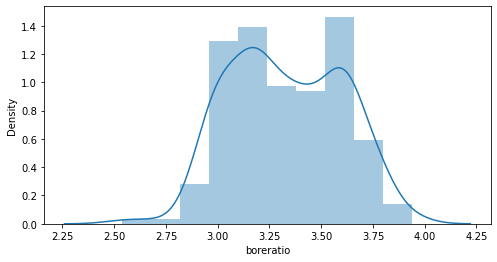

In [501]:
plt.figure(figsize=(8,4))
sns.distplot(df['boreratio'])

<AxesSubplot:xlabel='boreratio', ylabel='price'>

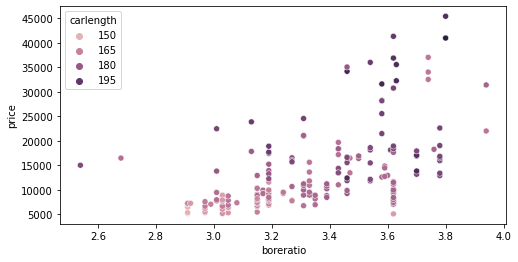

In [502]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['boreratio'],df['price'],hue=df['carlength'])

<AxesSubplot:xlabel='boreratio'>

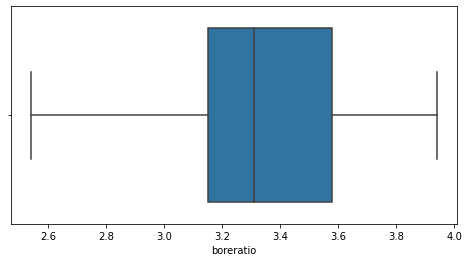

In [503]:
plt.figure(figsize=(8,4))
sns.boxplot(df['boreratio'])

<AxesSubplot:xlabel='stroke', ylabel='Density'>

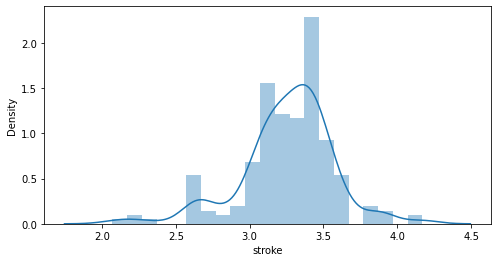

In [504]:
plt.figure(figsize=(8,4))
sns.distplot(df['stroke'])

,stroke,price
stroke,1.000000,0.079443
price,0.079443,1.000000


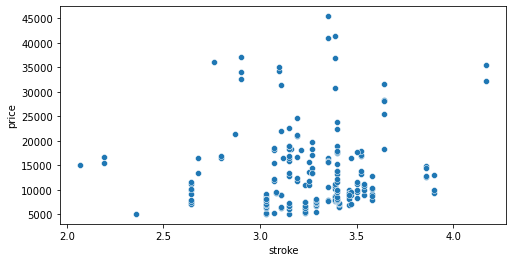

In [505]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['stroke'],df['price'])
df[['stroke','price']].corr()

<AxesSubplot:xlabel='compressionratio', ylabel='Density'>

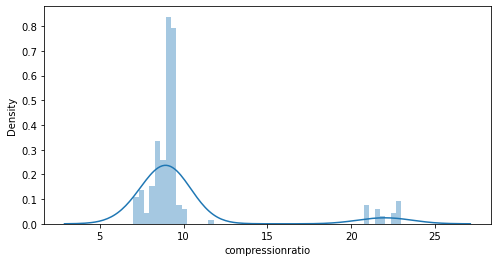

In [506]:
plt.figure(figsize=(8,4))
sns.distplot(df['compressionratio'])

,compressionratio,price
compressionratio,1.000000,0.067984
price,0.067984,1.000000


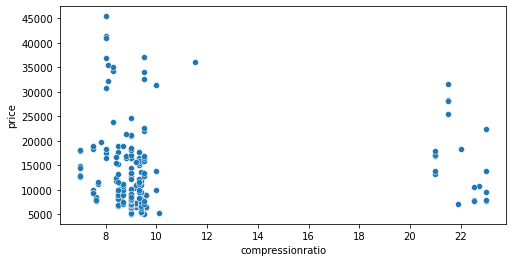

In [507]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['compressionratio'],df['price'])
df[['compressionratio','price']].corr()

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

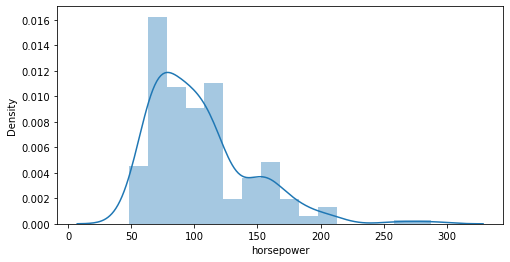

In [508]:
plt.figure(figsize=(8,4))
sns.distplot(df['horsepower'])

<AxesSubplot:xlabel='horsepower', ylabel='price'>

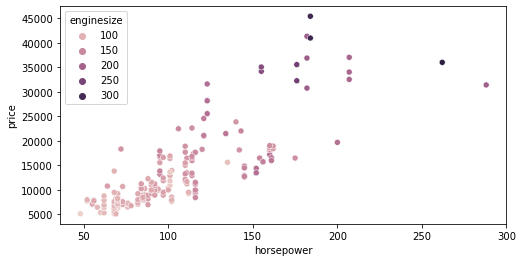

In [509]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['horsepower'],df['price'],hue=df['enginesize'])

<AxesSubplot:xlabel='horsepower'>

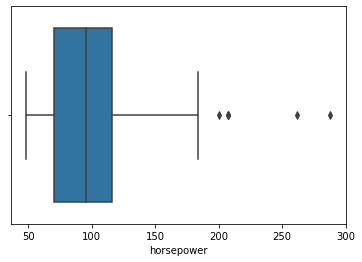

In [510]:
sns.boxplot(df['horsepower'])

<AxesSubplot:xlabel='peakrpm', ylabel='Density'>

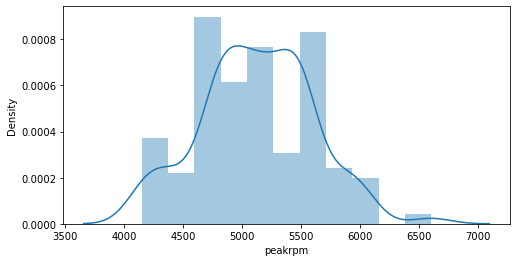

In [511]:
plt.figure(figsize=(8,4))
sns.distplot(df['peakrpm'])

,peakrpm,price
peakrpm,1.000000,-0.085267
price,-0.085267,1.000000


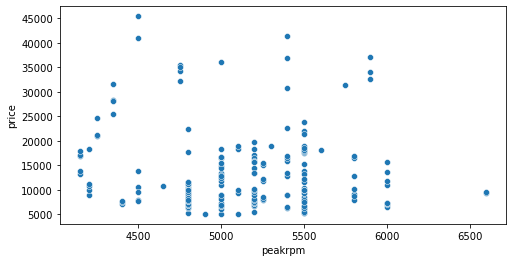

In [512]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['peakrpm'],df['price'])
df[['peakrpm','price']].corr()

<AxesSubplot:xlabel='citympg', ylabel='Density'>

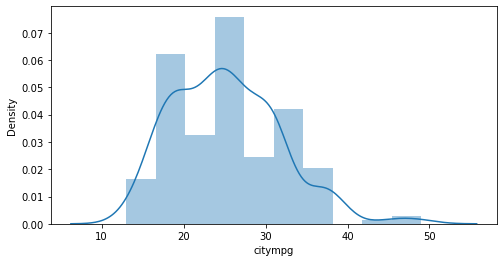

In [513]:
plt.figure(figsize=(8,4))
sns.distplot(df['citympg'])

,citympg,price
citympg,1.000000,-0.685751
price,-0.685751,1.000000


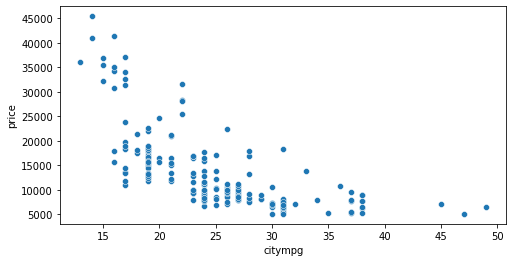

In [514]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['citympg'],df['price'])
df[['citympg','price']].corr()

<AxesSubplot:xlabel='citympg'>

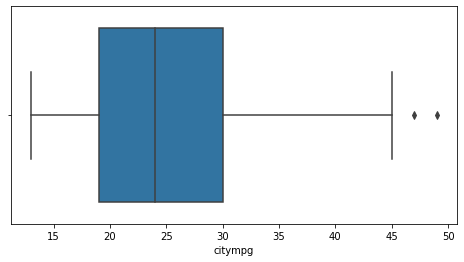

In [515]:
plt.figure(figsize=(8,4))
sns.boxplot(df['citympg'])

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

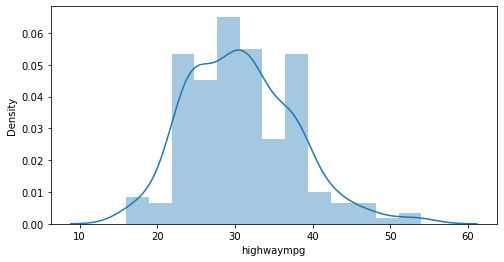

In [516]:
plt.figure(figsize=(8,4))
sns.distplot(df['highwaympg'])

,highwaympg,price
highwaympg,1.000000,-0.697599
price,-0.697599,1.000000


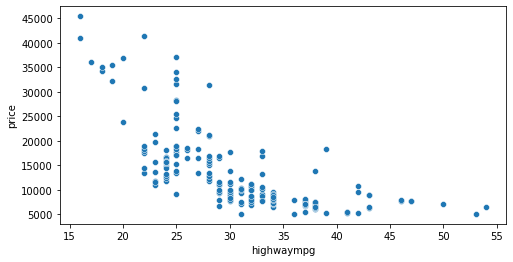

In [517]:
plt.figure(figsize=(8,4))
sns.scatterplot(df['highwaympg'],df['price'])
df[['highwaympg','price']].corr()

<AxesSubplot:xlabel='highwaympg'>

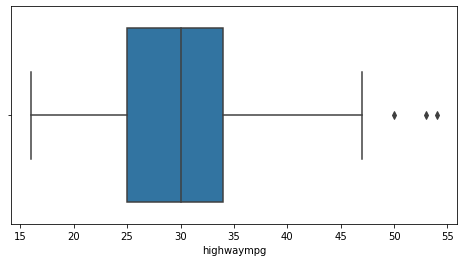

In [518]:
plt.figure(figsize=(8,4))
sns.boxplot(df['highwaympg'])

### Treat Outliers

In [519]:
# Wheelbase
# carlength
# carwidth
# enginesize
# hoursepower
# citympg
# highwaympg

In [520]:
# whell

qrt1=np.quantile(df['wheelbase'],q=0.25)
median=np.median(df['wheelbase'])
qrt3=np.quantile(df['wheelbase'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)

Quartile 1 : 94.5
Median     : 97.0
Quartile 3 : 102.4
Lowerbound : 82.64999999999999
Upperbound : 114.25000000000001


In [521]:
out=[]
for i in df['wheelbase']:
    if i>uppb:
        out.append(uppb)
    else:
        out.append(i)
df['wheelbase']=out

<AxesSubplot:xlabel='wheelbase'>

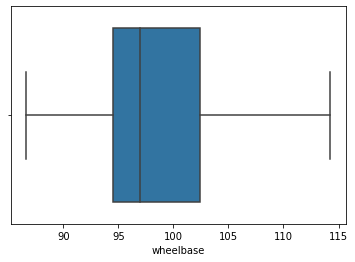

In [522]:
sns.boxplot(df['wheelbase'])

In [523]:
# carlength

qrt1=np.quantile(df['carlength'],q=0.25)
median=np.median(df['carlength'])
qrt3=np.quantile(df['carlength'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)

Quartile 1 : 166.3
Median     : 173.2
Quartile 3 : 183.1
Lowerbound : 141.10000000000002
Upperbound : 208.29999999999995


In [524]:
out=[]
for i in df['carlength']:
    if i < lowb:
        out.append(lowb)
    else:
        out.append(i)
df['carlength']=out

<AxesSubplot:xlabel='carlength'>

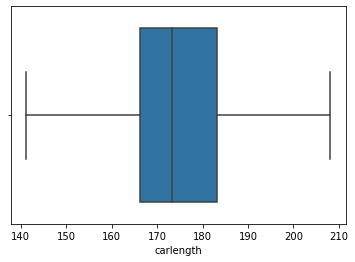

In [525]:
sns.boxplot(df['carlength'])

In [526]:
# carwidth

qrt1=np.quantile(df['carwidth'],q=0.25)
median=np.median(df['carwidth'])
qrt3=np.quantile(df['carwidth'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)

Quartile 1 : 64.1
Median     : 65.5
Quartile 3 : 66.9
Lowerbound : 59.89999999999998
Upperbound : 71.10000000000002


In [527]:
out=[]
for i in df['carwidth']:
    if i > uppb:
        out.append(uppb)
    else:
        out.append(i)
df['carwidth']=out

<AxesSubplot:xlabel='carwidth'>

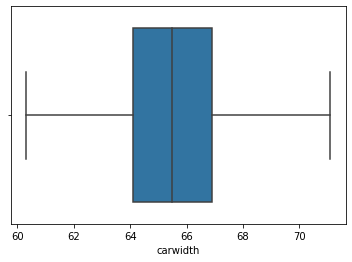

In [528]:
sns.boxplot(df['carwidth'])

In [529]:
# enginesize

qrt1=np.quantile(df['enginesize'],q=0.25)
median=np.median(df['enginesize'])
qrt3=np.quantile(df['enginesize'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)

Quartile 1 : 97.0
Median     : 120.0
Quartile 3 : 141.0
Lowerbound : 31.0
Upperbound : 207.0


In [530]:
out=[]
for i in df['enginesize']:
    if i > uppb:
        out.append(uppb)
    else:
        out.append(i)
df['enginesize']=out

<AxesSubplot:xlabel='enginesize'>

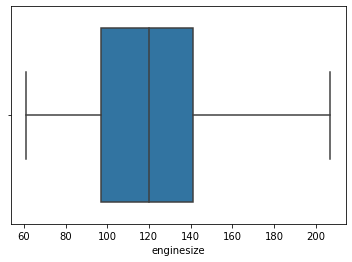

In [531]:
sns.boxplot(df['enginesize'])

In [532]:
# hoursepower

qrt1=np.quantile(df['horsepower'],q=0.25)
median=np.median(df['horsepower'])
qrt3=np.quantile(df['horsepower'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)

Quartile 1 : 70.0
Median     : 95.0
Quartile 3 : 116.0
Lowerbound : 1.0
Upperbound : 185.0


In [533]:
out=[]
for i in df['horsepower']:
    if i > uppb:
        out.append(uppb)
    else:
        out.append(i)
df['horsepower']=out

<AxesSubplot:xlabel='horsepower'>

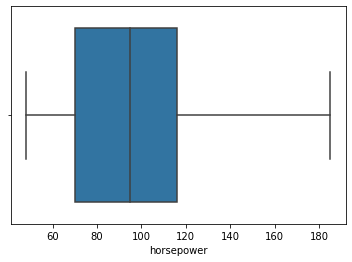

In [534]:
sns.boxplot(df['horsepower'])

In [535]:
# citympg

qrt1=np.quantile(df['citympg'],q=0.25)
median=np.median(df['citympg'])
qrt3=np.quantile(df['citympg'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)

Quartile 1 : 19.0
Median     : 24.0
Quartile 3 : 30.0
Lowerbound : 2.5
Upperbound : 46.5


In [536]:
out=[]
for i in df['citympg']:
    if i > uppb:
        out.append(uppb)
    else:
        out.append(i)
df['citympg']=out

<AxesSubplot:xlabel='citympg'>

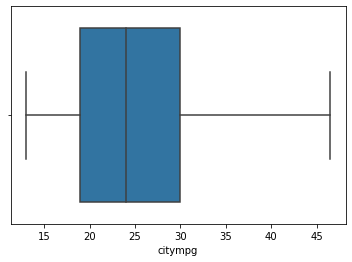

In [537]:
sns.boxplot(df['citympg'])

In [538]:
# highwaympg

qrt1=np.quantile(df['highwaympg'],q=0.25)
median=np.median(df['highwaympg'])
qrt3=np.quantile(df['highwaympg'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)

Quartile 1 : 25.0
Median     : 30.0
Quartile 3 : 34.0
Lowerbound : 11.5
Upperbound : 47.5


In [539]:
out=[]
for i in df['highwaympg']:
    if i > uppb:
        out.append(uppb)
    else:
        out.append(i)
df['highwaympg']=out

<AxesSubplot:xlabel='highwaympg'>

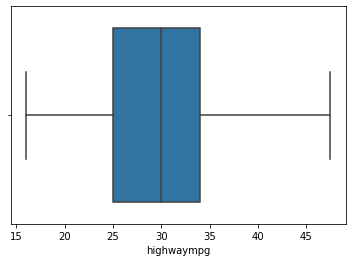

In [540]:
sns.boxplot(df['highwaympg'])

In [541]:
for i in df:
    if df[i].dtype=='object':
        print(i)

CarName
carbody
drivewheel
enginelocation
fueltype
aspiration
doornumber
cylindernumber
enginetype
fuelsystem


In [542]:
df['drivewheel']=df['drivewheel'].map({'rwd':0,'fwd':1,'4wd':2})
df['enginelocation']=df['enginelocation'].map({'front':0,'rear':1})
df['fueltype']=df['fueltype'].map({'gas':0,'diesel':1})
df['aspiration']=df['aspiration'].map({'std':0,'turbo':1})
df['doornumber']=df['doornumber'].map({'two':0,'four':1})

### Split the Dataset

In [543]:
x=np.array(df.drop(columns=['price']))
y=np.array(df['price'])

In [544]:
from sklearn.model_selection import train_test_split

In [545]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [546]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [547]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [548]:
from sklearn.metrics import r2_score

### Creating the Model

### LinearRegression

In [556]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore' ),[0,1,7,8,9])],remainder='passthrough')
step2= LinearRegression()
pipe=Pipeline([
     ('step1',step1),
     ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))

R2 Score : 0.9236094493838813


### Decision Tree

In [558]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore' ),[0,1,7,8,9])],remainder='passthrough')
step2= DecisionTreeRegressor()
pipe=Pipeline([
     ('step1',step1),
     ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))

R2 Score : 0.9351928828108722


### KNN

In [559]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore' ),[0,1,7,8,9])],remainder='passthrough')
step2= KNeighborsRegressor()
pipe=Pipeline([
     ('step1',step1),
     ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))

R2 Score : 0.850204966953964


### Random Forest

In [560]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore' ),[0,1,7,8,9])],remainder='passthrough')
step2= RandomForestRegressor(n_estimators=120,max_depth=5)
pipe=Pipeline([
     ('step1',step1),
     ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))

R2 Score : 0.9310907546721119


### SVM

In [561]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore' ),[0,1,7,8,9])],remainder='passthrough')
step2= SVR()
pipe=Pipeline([
     ('step1',step1),
     ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))

R2 Score : -0.22192198268226826


### Gradient Boost

In [562]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore' ),[0,1,7,8,9])],remainder='passthrough')
step2= GradientBoostingRegressor()
pipe=Pipeline([
     ('step1',step1),
     ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))

R2 Score : 0.9411434427884969


### Adaboost

In [563]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore' ),[0,1,7,8,9])],remainder='passthrough')
step2= AdaBoostRegressor()
pipe=Pipeline([
     ('step1',step1),
     ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))

R2 Score : 0.923125014154424


### XGBoost

In [572]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore' ),[0,1,7,8,9])],remainder='passthrough')
step2= XGBRegressor(n_estimators=250,max_depth=3)
pipe=Pipeline([
         ('step1',step1),
         ('step2',step2)
    ])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))

R2 Score : 0.9584426029397224


In [586]:
pipe.predict([['alfa romero','convertible',0,0,0,0,0,'four','dohc','mpfi',3,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.0,111.0,5000,21.0,27.0]])[0]

15004.615

### Pickle 

In [587]:
import pickle

In [589]:
dataframe=pickle.dump(df,open('df.pkl','wb'))
pipe_pkl=pickle.dump(pipe,open('pipe.pkl','wb'))